In [7]:
import pandas as pd

In [36]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic-Dataset.csv')

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
# Проверка количества пустых ячеек в каждом столбце
empty_cells_count = df.isnull().sum()

# Вывод количества пустых ячеек
print("Количество пустых ячеек в каждом столбце:")
print(empty_cells_count)

Количество пустых ячеек в каждом столбце:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [39]:
# Удаление строк с пустыми значениями
df.dropna(inplace=True)

# Проверка количества пустых ячеек после удаления
empty_cells_count = df.isnull().sum()

# Вывод количества пустых ячеек (теперь должно быть нулевое количество)
print("Количество пустых ячеек в каждом столбце после удаления:")
print(empty_cells_count)

Количество пустых ячеек в каждом столбце после удаления:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [40]:
# Аналитика на каждом признаке
for column in df.columns:
    unique_values = df[column].nunique()
    min_value = df[column].min()
    max_value = df[column].max()
    print(f"Признак: {column}")
    print(f"Количество уникальных значений: {unique_values}")
    print(f"Минимальное значение: {min_value}")
    print(f"Максимальное значение: {max_value}")
    print()

Признак: PassengerId
Количество уникальных значений: 183
Минимальное значение: 2
Максимальное значение: 890

Признак: Survived
Количество уникальных значений: 2
Минимальное значение: 0
Максимальное значение: 1

Признак: Pclass
Количество уникальных значений: 3
Минимальное значение: 1
Максимальное значение: 3

Признак: Name
Количество уникальных значений: 183
Минимальное значение: Allen, Miss. Elisabeth Walton
Максимальное значение: Young, Miss. Marie Grice

Признак: Sex
Количество уникальных значений: 2
Минимальное значение: female
Максимальное значение: male

Признак: Age
Количество уникальных значений: 63
Минимальное значение: 0.92
Максимальное значение: 80.0

Признак: SibSp
Количество уникальных значений: 4
Минимальное значение: 0
Максимальное значение: 3

Признак: Parch
Количество уникальных значений: 4
Минимальное значение: 0
Максимальное значение: 4

Признак: Ticket
Количество уникальных значений: 127
Минимальное значение: 110152
Максимальное значение: WE/P 5735

Признак: Fare
Ко

In [43]:
# Аналитика влияния признаков на выживание
for column in df.columns:
    if column != 'Survived':
        grouped_data = df.groupby(column)['Survived'].mean()
        print(f"Влияние признака '{column}' на выживание:")
        print(grouped_data)
        print()



Влияние признака 'PassengerId' на выживание:
PassengerId
2      1.0
4      1.0
7      0.0
11     1.0
12     1.0
      ... 
872    1.0
873    0.0
880    1.0
888    1.0
890    1.0
Name: Survived, Length: 183, dtype: float64

Влияние признака 'Pclass' на выживание:
Pclass
1    0.670886
2    0.800000
3    0.500000
Name: Survived, dtype: float64

Влияние признака 'Name' на выживание:
Name
Allen, Miss. Elisabeth Walton                      1.0
Allison, Master. Hudson Trevor                     1.0
Allison, Miss. Helen Loraine                       0.0
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    0.0
Anderson, Mr. Harry                                1.0
                                                  ... 
White, Mr. Percival Wayland                        0.0
White, Mr. Richard Frasar                          0.0
Wick, Miss. Mary Natalie                           1.0
Widener, Mr. Harry Elkins                          0.0
Young, Miss. Marie Grice                           1.0
Name: Su

<Figure size 800x600 with 0 Axes>

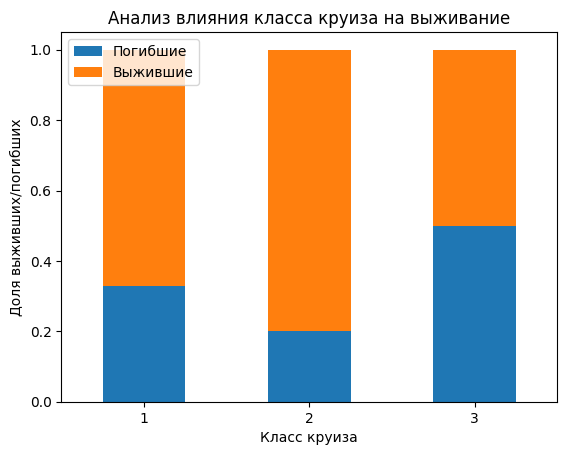

<Figure size 800x600 with 0 Axes>

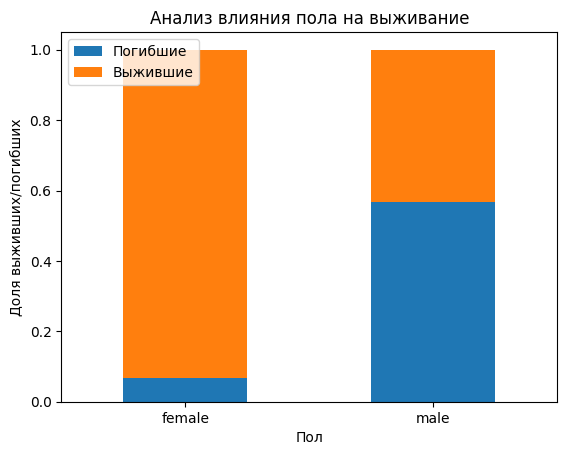

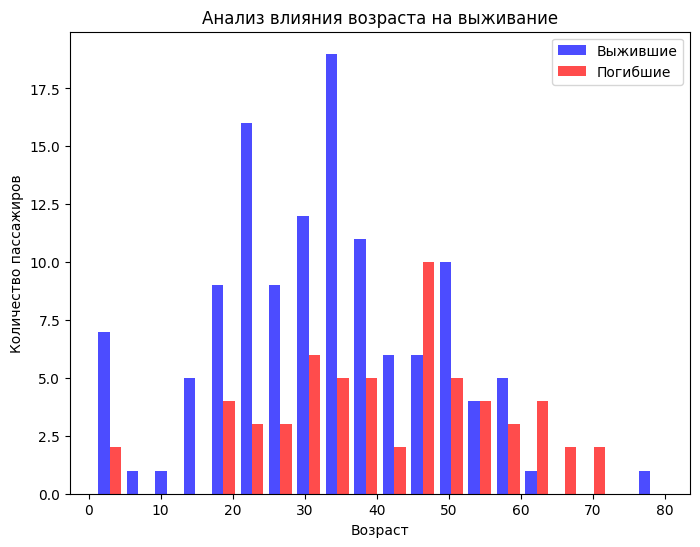

In [44]:
import matplotlib.pyplot as plt

# Заполним пустые значения возраста медианным значением возраста
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Заполним пустые значения столбца 'Cabin' наиболее часто встречающимся значением
most_common_cabin = df['Cabin'].mode()[0]
df['Cabin'].fillna(most_common_cabin, inplace=True)

# Заполним пустые значения столбца 'Embarked' наиболее часто встречающимся значением
most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_embarked, inplace=True)

# Построение столбчатой диаграммы для анализа влияния класса круиза на выживание
plt.figure(figsize=(8, 6))
survived_by_pclass = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()
survived_by_pclass.plot(kind='bar', stacked=True)
plt.title('Анализ влияния класса круиза на выживание')
plt.xlabel('Класс круиза')
plt.ylabel('Доля выживших/погибших')
plt.legend(['Погибшие', 'Выжившие'], loc='upper left')
plt.xticks(rotation=0)
plt.show()

# Построение столбчатой диаграммы для анализа влияния пола на выживание
plt.figure(figsize=(8, 6))
survived_by_sex = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()
survived_by_sex.plot(kind='bar', stacked=True)
plt.title('Анализ влияния пола на выживание')
plt.xlabel('Пол')
plt.ylabel('Доля выживших/погибших')
plt.legend(['Погибшие', 'Выжившие'], loc='upper left')
plt.xticks(rotation=0)
plt.show()

# Гистограмма для анализа влияния возраста на выживание
plt.figure(figsize=(8, 6))
survived_by_age = df[df['Survived'] == 1]['Age']
not_survived_by_age = df[df['Survived'] == 0]['Age']
plt.hist([survived_by_age, not_survived_by_age], bins=20, color=['blue', 'red'], alpha=0.7, label=['Выжившие', 'Погибшие'])
plt.title('Анализ влияния возраста на выживание')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.legend(loc='upper right')
plt.show()
